In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.client import device_lib
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
import requests

df = pd.read_csv("/content/drive/MyDrive/Datasets/Artists.csv")

df

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X
...,...,...,...,...,...,...,...,...,...
9483,IVAN$ITO,0cPmSFfjpop7imPVWSk2yc,NaN,0,NaN,[],20,4249,spotify:artist:0cPmSFfjpop7imPVWSk2yc
9484,Antonello Venditti,3hYLJPJuDyblFKersEaFd6,male,71,IT,"[""canzone d'autore"", 'classic italian pop', 'i...",54,778642,spotify:artist:3hYLJPJuDyblFKersEaFd6
9485,Lea Salonga,1GlMjIezcLwV3OFlX0uXOv,female,49,PH,"['movie tunes', 'tagalog worship']",56,179832,spotify:artist:1GlMjIezcLwV3OFlX0uXOv
9486,Vertical Horizon,6Hizgjo92FnMp8wGaRUNTn,mixed,29,NaN,"['neo mellow', 'pop rock', 'post-grunge']",48,431277,spotify:artist:6Hizgjo92FnMp8wGaRUNTn


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Name', 'ID', 'Gender', 'Age', 'Country', 'Genres', 'Popularity',
       'Followers', 'URI'],
      dtype='object')

In [ ]:
df = df.drop(["Popularity","Genres", "Followers", "URI"], axis = 1)


In [ ]:
df

,Name,ID,Gender,Age,Country
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR
...,...,...,...,...,...
9480,Daniela Romo,6gvh8pQI316iafbHiT7B3y,female,60,MX
9481,Nasty C,2gzWmhOZhDN6gXL49JW9qj,male,23,ZA
9484,Antonello Venditti,3hYLJPJuDyblFKersEaFd6,male,71,IT
9485,Lea Salonga,1GlMjIezcLwV3OFlX0uXOv,female,49,PH


In [ ]:
df.shape

(6126, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Name'] = encoder.fit_transform(df['Name'])
df['ID'] = encoder.fit_transform(df['ID'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Age'] = encoder.fit_transform(df['Age'])
df['Country'] = encoder.fit_transform(df['Country'])


In [ ]:
df

,Name,ID,Gender,Age,Country
0,1444,2739,1,33,15
1,4462,1617,1,25,92
2,1507,5186,1,29,34
3,2364,1517,1,35,22
4,504,3778,1,26,73
...,...,...,...,...,...
9480,1209,5226,0,60,61
9481,4004,2129,1,23,101
9484,351,2920,1,71,49
9485,3153,1015,0,49,70


In [ ]:
print('Gender:', df['Gender'].nunique(), '\n')

Gender: 4 



In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
X = df.drop(["Gender"], axis=1)
y = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU

model = keras.Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()
from keras.optimizers import Adam
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13189 (51.52 KB)
Trainable params: 13189 (51.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


61/62 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.0010    

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


62/62 [==============================] - 6s 30ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
62/62 [==============================] - 1s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
62/62 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
62/62 [==============================] - 1s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0010 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
62/62 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - ac

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f'accuracy: {accuracy*100}%')

154/154 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 8.1633e-04
accuracy: 0.08163265301845968%


In [ ]:
import matplotlib.pyplot as plt
import gdown
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import random
from matplotlib.image import imread
from PIL import Image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as image

import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix


image_df =  pd.read_csv("/content/drive/MyDrive/Datasets/Lab3/sports.csv")

In [ ]:
image_df

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train
...,...,...,...,...
14488,99,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14489,99,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14490,99,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14491,99,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [ ]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")

Total number of target classes : 100


In [ ]:
labels_to_keep = ['arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball']

image_df = image_df[image_df['labels'].isin(labels_to_keep)]

image_df

,class id,filepaths,labels,data set
356,3,train/arm wrestling/01.jpg,arm wrestling,train
357,3,train/arm wrestling/02.jpg,arm wrestling,train
358,3,train/arm wrestling/03.jpg,arm wrestling,train
359,3,train/arm wrestling/04.jpg,arm wrestling,train
360,3,train/arm wrestling/05.jpg,arm wrestling,train
...,...,...,...,...
14028,7,valid/baseball/1.jpg,baseball,valid
14029,7,valid/baseball/2.jpg,baseball,valid
14030,7,valid/baseball/3.jpg,baseball,valid
14031,7,valid/baseball/4.jpg,baseball,valid


In [ ]:
print(f"Total number of target classes : {len(image_df.labels.unique())}")


Total number of target classes : 5


In [ ]:
dataset = {
             "train_data" : "/content/drive/MyDrive/Datasets/Lab3/train",
             "valid_data" : "/content/drive/MyDrive/Datasets/Lab3/valid",
             "test_data" : "/content/drive/MyDrive/Datasets/Lab3/test"
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)


    all_data.append(data.copy())
    data.clear()



train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
valid_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))
test_df = pd.DataFrame(all_data[2] , index=range(len(all_data[2]['imgpath'])))


# #Convert labels to numbers
lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
valid_df['encoded_labels'] = lb.fit_transform(valid_df['labels'])
test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

In [ ]:
valid_df = valid_df[valid_df['labels'].isin(labels_to_keep)]
train_df = train_df[train_df['labels'].isin(labels_to_keep)]
test_df = test_df[test_df['labels'].isin(labels_to_keep)]

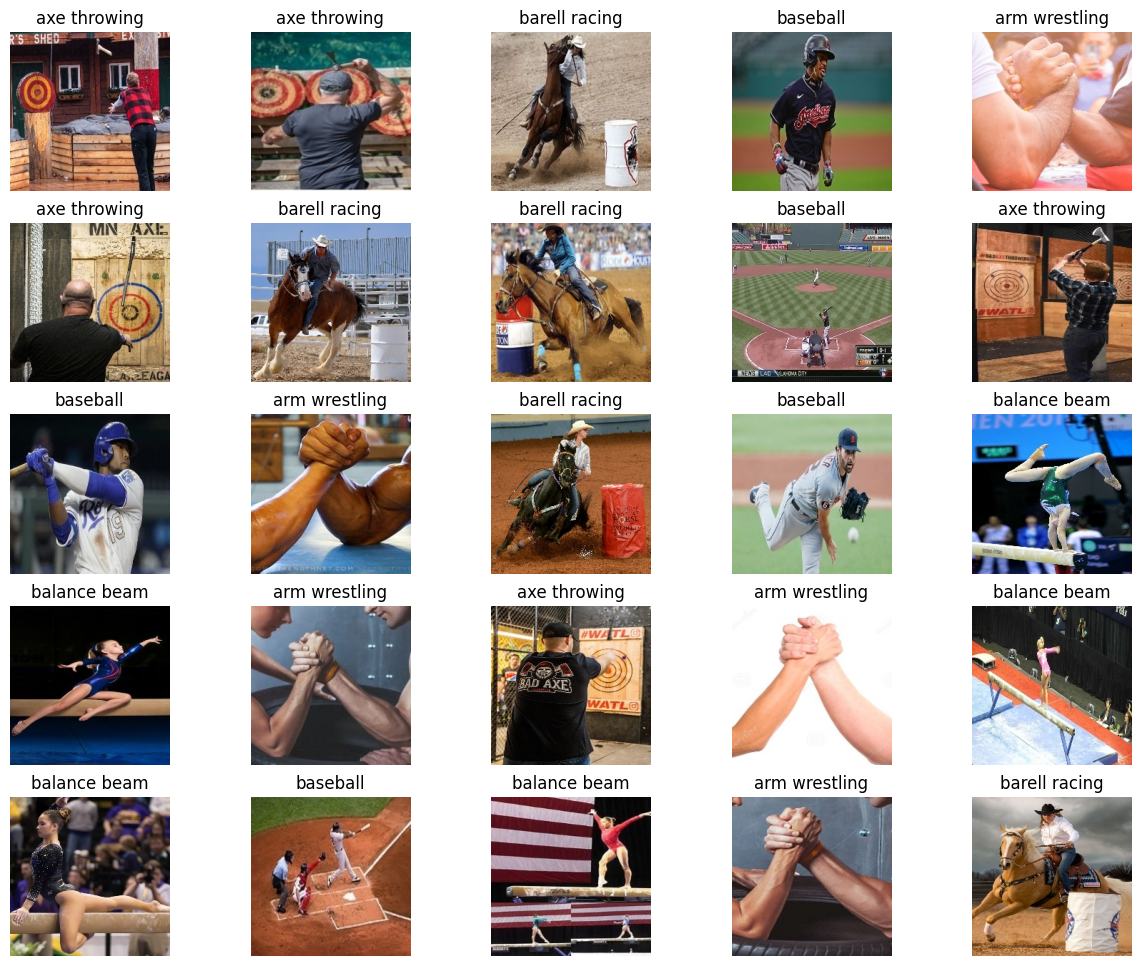

In [ ]:
plt.figure(figsize=(15,12))
for i, row in valid_df.sample(n=25).reset_index().iterrows():
    plt.subplot(5,5,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision



BATCH_SIZE = 10
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into three categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

valid_images = generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 656 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.
Found 25 validated image filenames belonging to 5 classes.


In [ ]:
pretrained_model = tf.keras.applications.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False, # we don`t need a pre-trained top layer (output layer)
    weights='imagenet',
    pooling='max'
)

# Freezing the layers of a pretrained neural network
for i, layer in enumerate(pretrained_model.layers):
    pretrained_model.layers[i].trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
num_classes = len(set(train_images.classes))


# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
], name='AugmentationLayer')



inputs = layers.Input(shape = (224,224,3), name='inputLayer')
x = augment(inputs)
pretrain_out = pretrained_model(x, training = False)
x = layers.Dense(350)(pretrain_out)
x = layers.Activation(activation="relu")(x)
x = BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(num_classes)(x)
outputs = layers.Activation(activation="softmax", dtype=tf.float32, name='activationLayer')(x) # mixed_precision need separated Dense and Activation layers
model = Model(inputs=inputs, outputs=outputs)



model.compile(
    optimizer=Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 AugmentationLayer (Sequent  (None, 224, 224, 3)       0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 dense_5 (Dense)             (None, 350)               448350    
                                                                 
 activation (Activation)     (None, 350)               0         
                                                                 
 batch_normalization (Batch  (None, 350)               1400  

In [ ]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=valid_images,
    validation_steps=len(valid_images),
    epochs=50,
    callbacks=[
        EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, mode='min')
    ]
)
model.save_weights('/content/drive/MyDrive/Datasets/Lab3')

Epoch 1/50
66/66 [==============================] - 141s 2s/step - loss: 0.3554 - accuracy: 0.8674 - val_loss: 0.0121 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 2/50
66/66 [==============================] - 59s 891ms/step - loss: 0.0873 - accuracy: 0.9771 - val_loss: 0.0028 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 3/50
66/66 [==============================] - 54s 812ms/step - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0029 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 4/50
66/66 [==============================] - 55s 822ms/step - loss: 0.0731 - accuracy: 0.9741 - val_loss: 0.0047 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 5/50
66/66 [==============================] - 55s 831ms/step - loss: 0.0490 - accuracy: 0.9802 - val_loss: 0.0021 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/50
66/66 [==============================] - 63s 958ms/step - loss: 0.0377 - accuracy: 0.9909 - val_loss: 0.0013 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 7/50
66/66 [========================

In [ ]:
results = model.evaluate(test_images, verbose=0)

print("Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.2f}%".format(results[1] * 100))

Loss: 0.00036
Accuracy: 100.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [ ]:
Text_data= pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')
Text_data

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


# Новый раздел

In [ ]:
Text_data = Text_data.iloc[:, 3:5].dropna()
Text_data

,Userscore,Comment
0,10,"Everything in OoT is so near at perfection, it..."
1,10,I won't bore you with what everyone is already...
2,10,Anyone who gives the masterpiece below a 7 or ...
3,10,I'm one of those people who think that this is...
4,10,This game is the highest rated game on Metacr...
...,...,...
283978,7,"Extremely similar to EO:4, which obviously isn..."
283979,0,Typical overrated Atlus trash. A game i should...
283980,9,While I find the story mode to have annoying c...
283981,8,"Pretty good, but it certainly lacks the visual..."


In [ ]:
X_text_train = Text_data.iloc[:, 1] #Comment
Y_text_train = Text_data.iloc[:, 0] #Userscore

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()

X_text_simpl, Y_text_simpl = undersampler.fit_resample(np.array(X_text_train).reshape(-1, 1), np.array(Y_text_train).reshape(-1, 1))
Text_data_simp = pd.DataFrame({'Comment': X_text_simpl.reshape(Y_text_simpl.shape), 'Userscore': Y_text_simpl})

In [ ]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(Text_data_simp['Comment'], Text_data_simp['Userscore'], test_size=0.20)

In [ ]:
labelencoder_text = LabelEncoder()
Y_text_train = labelencoder_text.fit_transform(Y_text_train)
Y_text_test = labelencoder_text.transform(Y_text_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text_train)
X_train_seq = tokenizer.texts_to_sequences(X_text_train)
X_test_seq = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Padding
max_sequence_length = 1000
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
model3 = keras.Sequential()
model3.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model3.add(LSTM(100))
model3.add(Dense(11, activation='sigmoid'))

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         128000    
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense_7 (Dense)             (None, 11)                1111      
                                                                 
Total params: 220711 (862.15 KB)
Trainable params: 220711 (862.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
epochs = 20
batch_size = 256
history = model3.fit(X_train_pad, Y_text_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
206/206 [==============================] - 1087s 5s/step - loss: 2.1690 - accuracy: 0.1945
Epoch 2/20
206/206 [==============================] - 1067s 5s/step - loss: 1.9555 - accuracy: 0.2647
Epoch 3/20
206/206 [==============================] - 1077s 5s/step - loss: 1.9136 - accuracy: 0.2792
Epoch 4/20
206/206 [==============================] - 1085s 5s/step - loss: 1.8948 - accuracy: 0.2933
Epoch 5/20
206/206 [==============================] - 1079s 5s/step - loss: 1.8632 - accuracy: 0.3058
Epoch 6/20
206/206 [==============================] - 1078s 5s/step - loss: 1.8458 - accuracy: 0.3119
Epoch 7/20
206/206 [==============================] - 1078s 5s/step - loss: 1.8203 - accuracy: 0.3223
Epoch 8/20
206/206 [==============================] - 1081s 5s/step - loss: 1.7954 - accuracy: 0.3323
Epoch 9/20
206/206 [==============================] - 1102s 5s/step - loss: 1.7764 - accuracy: 0.3392
Epoch 10/20
206/206 [==============================] - 1071s 5s/step - loss: 1.761

In [43]:
loss, accuracy = model3.evaluate(X_test_pad, Y_text_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

412/412 [==============================] - 151s 365ms/step - loss: 1.9690 - accuracy: 0.2861
Loss: 1.9690
Accuracy: 0.2861
